In [1]:
import random
import math

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.evolution_functions import next_generation, plot_n_pt, plot_pt_qt, plot_n_pt_qt, plot_n_p2_q2_pq

# Implementação 1

1. Avaliar os efeitos nas frequências gênicas de uma
população muito grande com mutação recorrente
unidirecional para um loco com dois alelos

2. Simular diferentes valores iniciais de p

3. Simular com u = 1.0e-4
    - Simular 5 ordens de grandeza diferentes para
valores de u

Responder e demonstrar:

- Ocorre estagnação? Se sim, em quantas gerações?

- Ocorre perda da variabilidade genética? Se sim, em
quantas gerações?

- Mesmo agindo isoladamente, e em uma taxa
pequena, a mutação causou alteração significativa
nas frequências?

- A população está em EHW? Até quantas gerações?
    * Como testar o EHW?

Responder às perguntas (variar u, p, etc)

* Teste do CHI² para os valores das frequências dos
genótipos observados e esperados (segundo o EHW)

* Gráficos
    - p, q pela geração T
    - frequência de AA, AB, BB pela geração T
    - CHI² pela geração T

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 0.633386794340814, Final q: 0.3666132056572665


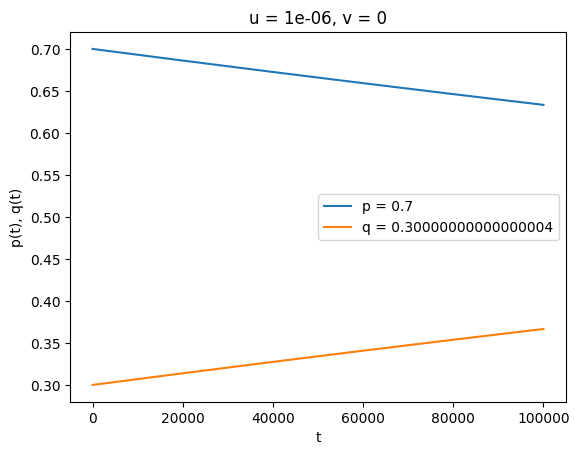

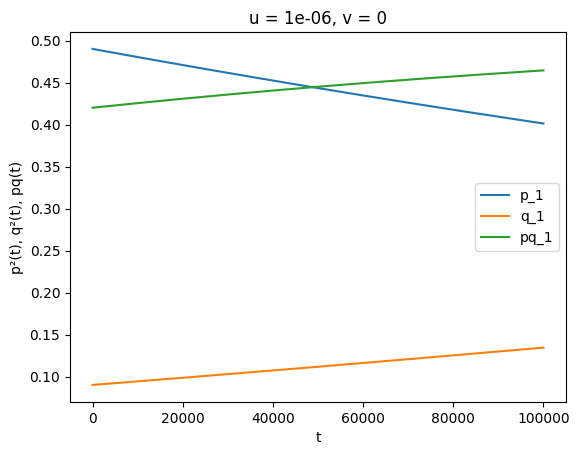

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 0.25751689640673875, Final q: 0.7424831035952824


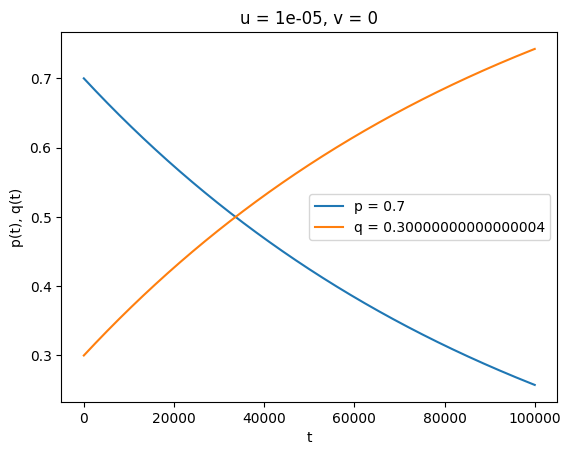

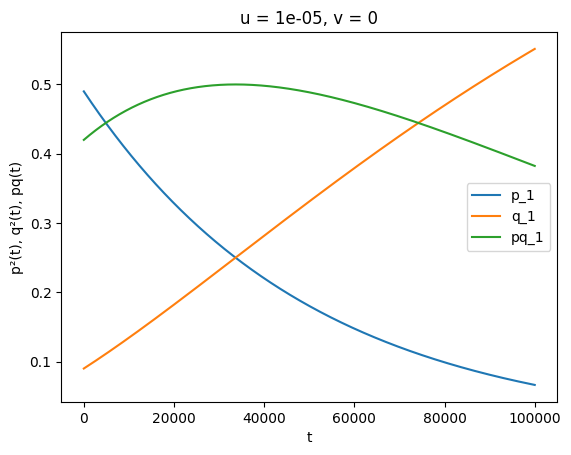

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 3.176724049535759e-05, Final q: 0.9999682327595859


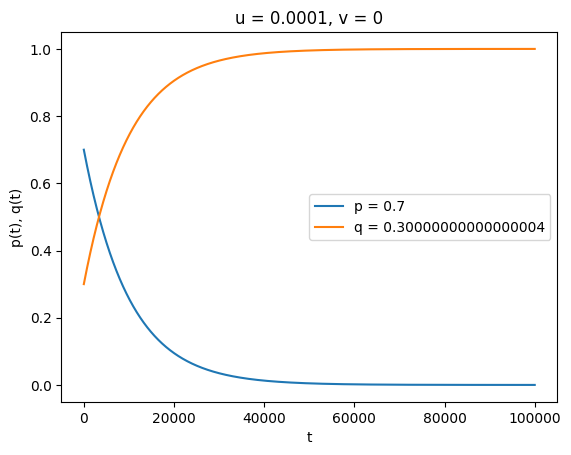

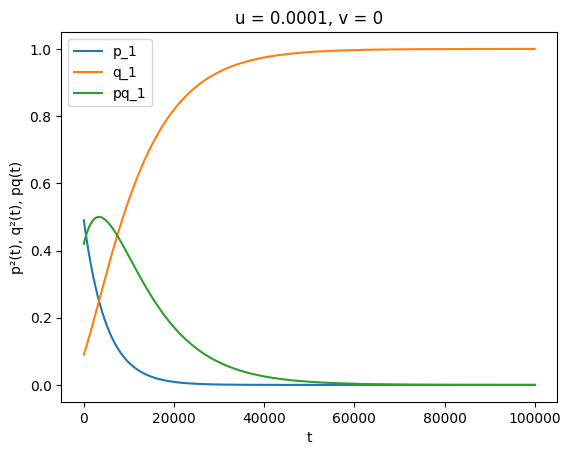

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 2.4794488306708057e-44, Final q: 0.999999999999962


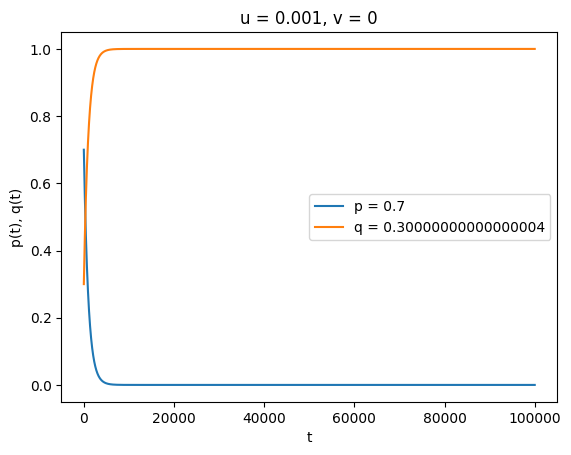

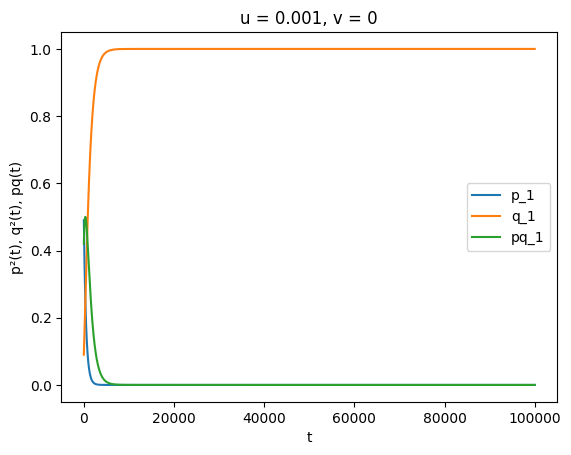

 p inicial, 0.7, q inicial, 0.30000000000000004
Final p: 2.4e-322, Final q: 0.9999999999999971


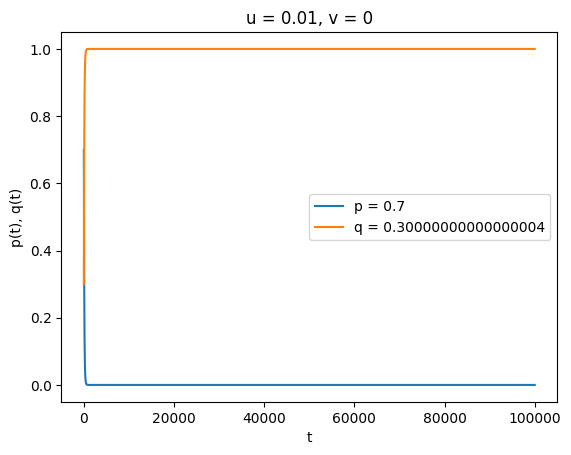

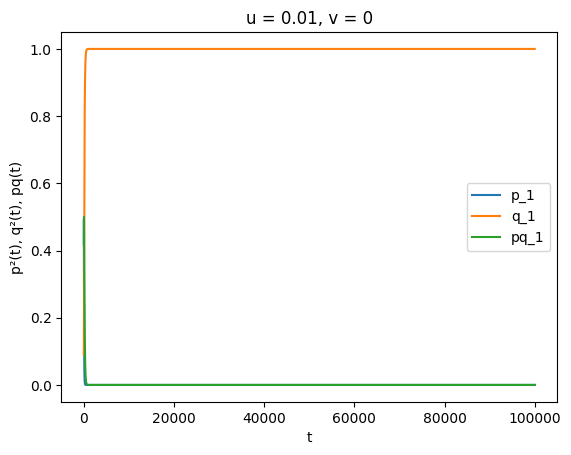

In [5]:
u_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
p0_list = [0.7]#, 0.6, 0.5, 0.8, 0.4]
q0_list = [1 - p0 for p0 in p0_list]
# v_list = [1e-4, 1e-3, 1e-2, 1e-1]

v = 0
t = np.arange(100000)
precision = 10

N = 1e9

estag_gens = {}
eq_gens = {}
gen_loss = {}

# EHW é P0 e Q0, por isso, precisamos comparar os valores obtidos com os valores iniciais
# Utilizando o chi squared

for u in u_list:
    p_t_list = []
    q_t_list = []
    p2_t_list = []
    q2_t_list = []
    pq_t_list = []
    for k, p0 in enumerate(p0_list):
        q0 = q0_list[k]

        p_t = [p0]
        q_t = [q0]
        p2_t = [p0 ** 2]
        q2_t = [q0 ** 2]
        pq_t = [2 * p0 * q0]

        dict_key = f"u={u} Pop={p0 * N}"
        print(f" p inicial, {p0}, q inicial, {q0}")
        for i in t:
            if i == 0:
                continue

            p, q = next_generation(p_t[i-1], q_t[i-1], u, v)

            if round(p, precision) == round(q, precision) and not eq_gens.get(dict_key, None):
                # print(f"Gen {i} p: {p} q: {q}")
                eq_gens[dict_key] = i
            
            if round(p, precision) == round(p_t[i-1], precision) and not estag_gens.get(dict_key, None):
                # print(f"Gen {i} p: {p} q: {q}")
                estag_gens[dict_key] = i
            
            p2 = p ** 2
            q2 = q ** 2
            pq = 2 * p * q
            
            # Verify genetic loss
            if int(pq * N) == 0 and not gen_loss.get(dict_key, None):
                # print(f"Gen {i} p: {p} q: {q}")
                gen_loss[dict_key] = i
            
            # Add chi squared

            # print(f"Gen {i} p: {p} q: {q}")
            p_t.append(p)
            q_t.append(q)
            p2_t.append(p2)
            q2_t.append(q2)
            pq_t.append(pq)
        
        p_t_list.append(p_t)
        q_t_list.append(q_t)
        p2_t_list.append(p2_t)
        q2_t_list.append(q2_t)
        pq_t_list.append(pq_t)


        print(f"Final p: {p_t[-1]}, Final q: {q_t[-1]}")
    # plot_n_pt(t, p_t_list, p0_list, u, v)

    # For each p value do the plot in a subplot
    plot_n_pt_qt(t, p_t_list, q_t_list, p0_list, q0_list, u, v)
    plot_n_p2_q2_pq(t, p2_t_list, q2_t_list, pq_t_list, p0_list, q0_list, u, v)

    # plot_pt(t, p_t, p0)
    # plot_pt(t, q_t, q0)

    # plot_pt_qt(t, p_t, q_t, p0, q0)


In [6]:
print("Estagnação")
for key, value in estag_gens.items():
    print(f"Estag Gen {key}: {value}")

print("Equilibrio")
for key, value in eq_gens.items():
    print(f"Eq Gen {key}: {value}")

print("Perda Genética")
for key, value in gen_loss.items():
    print(f"Gen Loss {key}: {value}")

Estagnação
Estag Gen u=0.01 Pop=1000.0: 73603
Estag Gen u=0.01 Pop=10000.0: 73662
Estag Gen u=0.01 Pop=100000.0: 73671
Estag Gen u=0.01 Pop=1000000.0: 73672
Estag Gen u=0.01 Pop=10000000.0: 73672
Equilibrio
Perda Genética
Gen Loss u=0.0001 Pop=1000.0: 76003
Gen Loss u=0.0001 Pop=10000.0: 99030
Gen Loss u=0.001 Pop=1000.0: 7597
Gen Loss u=0.001 Pop=10000.0: 9899
Gen Loss u=0.001 Pop=100000.0: 12200
Gen Loss u=0.001 Pop=1000000.0: 14502
Gen Loss u=0.001 Pop=10000000.0: 16803
Gen Loss u=0.01 Pop=1000.0: 757
Gen Loss u=0.01 Pop=10000.0: 986
Gen Loss u=0.01 Pop=100000.0: 1215
Gen Loss u=0.01 Pop=1000000.0: 1444
Gen Loss u=0.01 Pop=10000000.0: 1673


In [15]:
estag_gens

{'u=0.001 Pop=1000.0': 737049,
 'u=0.001 Pop=10000.0': 737647,
 'u=0.001 Pop=100000.0': 737732,
 'u=0.001 Pop=1000000.0': 737741,
 'u=0.001 Pop=10000000.0': 737742,
 'u=0.01 Pop=1000.0': 73603,
 'u=0.01 Pop=10000.0': 73662,
 'u=0.01 Pop=100000.0': 73671,
 'u=0.01 Pop=1000000.0': 73672,
 'u=0.01 Pop=10000000.0': 73672}